In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

from my_functions import read_obsfcstana

In [3]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2_fp_precip/DAv7_M36_ASCAT_type_2_fp_precip/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'DAv7_M36_ASCAT_type_2_fp_precip.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list = []
obs_fcst_mean_list = []
obs_ana_mean_list = []
omf_mean_list = []
oma_mean_list = []
dates_list = []
omf_max_list = []
omf_std_list = []
oma_std_list = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20210331', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '0401':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)
    oma_std = np.std(obs_obs - obs_ana)


    # Append the mean values to the lists
    obs_obs_mean_list.append(obs_obs_mean)
    obs_fcst_mean_list.append(obs_fcst_mean)
    obs_ana_mean_list.append(obs_ana_mean)
    omf_mean_list.append(omf_mean)
    oma_mean_list.append(oma_mean)
    omf_max_list.append(omf_max)
    omf_std_list.append(omf_std)
    oma_std_list.append(oma_std)
    
    # Append the current date to the dates list
    dates_list.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Current date =  2019-08-30 00:00:00
Current date =  2019-08-31 00:00:00


In [4]:
    np.savez(f'DAv7_M36_ASCAT_type_2_fp_precip_OmF_ts.npz', dates_list=dates_list, obs_obs_mean_list=obs_obs_mean_list, obs_fcst_mean_list=obs_fcst_mean_list, obs_ana_mean_list=obs_ana_mean_list, omf_mean_list=omf_mean_list, oma_mean_list=oma_mean_list, omf_max_list=omf_max_list, omf_std_list=omf_std_list, oma_std_list=oma_std_list) 



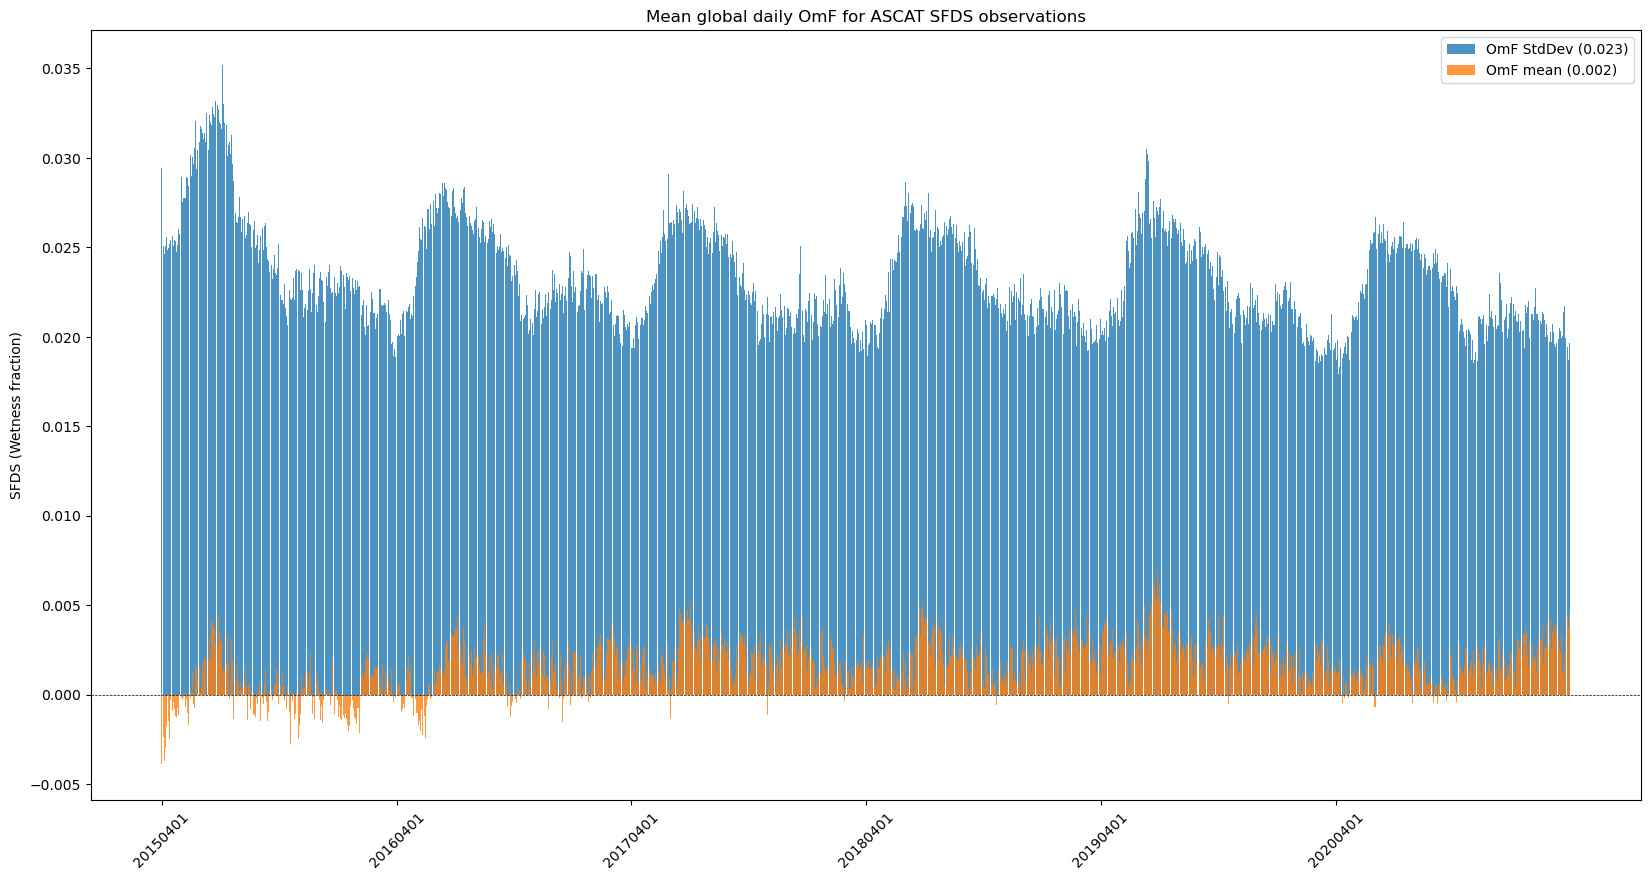

In [18]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.9
opacity = 0.8
index = np.arange(len(dates_list))

# Create a bar plot
plt.bar(index, omf_std_list, bar_width, alpha=opacity, label=f'OmF StdDev ({np.nanmean(omf_std_list):.3f})')
plt.bar(index, omf_mean_list, bar_width, alpha=opacity, label=f'OmF mean ({np.nanmean(omf_mean_list):.3f})')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list if date.endswith('0401')]
xtick_indices = [dates_list.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SFDS (Wetness fraction)')

plt.legend()

# Add a title
plt.title('Mean global daily OmF for ASCAT SFDS observations')

# Save the figure as a PNG file
plt.savefig('OmF_mean_ts.png')

plt.show()

In [2]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/DAv7_M36_ASCAT_type_2/DAv7_M36_ASCAT_type_2/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_a2 = []
obs_fcst_mean_list_a2 = []
obs_ana_mean_list_a2 = []
omf_mean_list_a2 = []
oma_mean_list_a2 = []
dates_list_a2 = []
omf_max_list_a2 = []
omf_std_list_a2 = []
oma_std_list_a2 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20160331', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '01':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)
    oma_std = np.std(obs_obs - obs_ana)


    # Append the mean values to the lists
    obs_obs_mean_list_a2.append(obs_obs_mean)
    obs_fcst_mean_list_a2.append(obs_fcst_mean)
    obs_ana_mean_list_a2.append(obs_ana_mean)
    omf_mean_list_a2.append(omf_mean)
    oma_mean_list_a2.append(oma_mean)
    omf_max_list_a2.append(omf_max)
    omf_std_list_a2.append(omf_std)
    oma_std_list_a2.append(oma_std)
    
    # Append the current date to the dates list
    dates_list_a2.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150401
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150501
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150601
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150701
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150801
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20150901
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20151001
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20151101
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20151201
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20160101
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20160201
DAv7_M36_ASCAT_type_2.ens_avg.ldas_ObsFcstAna.20160301


In [3]:
# Define the path directory
path_dir = '/home/amfox/smap/SMAP_Nature/SMAP_Nature_v10/DAv7_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'DAv7_M36.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_a10 = []
obs_fcst_mean_list_a10 = []
obs_ana_mean_list_a10 = []
omf_mean_list_a10 = []
oma_mean_list_a10 = []
dates_list_a10 = []
omf_max_list_a10 = []
omf_std_list_a10 = []
oma_std_list_a10 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20160331', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '01':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    # Calculate the mean values for the variables
    obs_obs_mean = np.mean(obs_obs)
    obs_fcst_mean = np.mean(obs_fcst)
    obs_ana_mean = np.mean(obs_ana)
    omf_mean = np.mean(obs_obs - obs_fcst)
    oma_mean = np.mean(obs_obs - obs_ana)
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst.size > 0 and obs_obs.size > 0 and obs_fcst.shape == obs_obs.shape:
        omf_max = np.max(abs(obs_obs - obs_fcst))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs - obs_fcst)
    oma_std = np.std(obs_obs - obs_ana)


    # Append the mean values to the lists
    obs_obs_mean_list_a10.append(obs_obs_mean)
    obs_fcst_mean_list_a10.append(obs_fcst_mean)
    obs_ana_mean_list_a10.append(obs_ana_mean)
    omf_mean_list_a10.append(omf_mean)
    oma_mean_list_a10.append(oma_mean)
    omf_max_list_a10.append(omf_max)
    omf_std_list_a10.append(omf_std)
    oma_std_list_a10.append(oma_std)
    
    # Append the current date to the dates list
    dates_list_a10.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

DAv7_M36.ens_avg.ldas_ObsFcstAna.20150401
DAv7_M36.ens_avg.ldas_ObsFcstAna.20150501


/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/amfox/.conda/envs/diag/lib/python3.10/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Current date =  2015-05-13 00:00:00
DAv7_M36.ens_avg.ldas_ObsFcstAna.20150601
DAv7_M36.ens_avg.ldas_ObsFcstAna.20150701
DAv7_M36.ens_avg.ldas_ObsFcstAna.20150801
DAv7_M36.ens_avg.ldas_ObsFcstAna.20150901
DAv7_M36.ens_avg.ldas_ObsFcstAna.20151001
DAv7_M36.ens_avg.ldas_ObsFcstAna.20151101
DAv7_M36.ens_avg.ldas_ObsFcstAna.20151201
Current date =  2015-12-16 00:00:00
DAv7_M36.ens_avg.ldas_ObsFcstAna.20160101
DAv7_M36.ens_avg.ldas_ObsFcstAna.20160201
DAv7_M36.ens_avg.ldas_ObsFcstAna.20160301


In [4]:
# Define the path directory
path_dir = '/discover/nobackup/amfox/Experiments/smap_ascat_multivariate_test/smap_ascat_multivariate_test/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg'

# Define the common file name start
file_name_start = 'smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.'

# Define the print flag
printflag = False

# Initialize lists to store the mean values for each variable and the dates
obs_obs_mean_list_a13a = []
obs_fcst_mean_list_a13a = []
obs_ana_mean_list_a13a = []
omf_mean_list_a13a = []
oma_mean_list_a13a = []
omf_max_list_a13a = []
omf_std_list_a13a = []
oma_std_list_a13a = []

obs_obs_mean_list_a13s = []
obs_fcst_mean_list_a13s = []
obs_ana_mean_list_a13s = []
omf_mean_list_a13s = []
oma_mean_list_a13s = []
omf_max_list_a13s = []
omf_std_list_a13s = []
oma_std_list_a13s = []

dates_list_a13 = []

# Define the start and end dates
start_date = datetime.strptime('20150401', '%Y%m%d')
end_date = datetime.strptime('20160331', '%Y%m%d')

# Loop over the dates
current_date = start_date
while current_date <= end_date:
    # Define the file name for the current date
    file_name = file_name_start + current_date.strftime('%Y%m%d')
    if file_name[-2:] == '01':
        print(file_name)
    
    # Call the read_obsfcstana function for the current file
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path_dir, file_name, printflag)

    # Convert the lists to numpy arrays
    obs_obs = np.array(obs_obs)
    obs_fcst = np.array(obs_fcst)
    obs_ana = np.array(obs_ana)
    
    smap_obs = (obs_species < 5)
    ascat_obs = (obs_species > 4)
   
    # Calculate the mean values for the variables for ASCAT
    obs_obs_mean = np.mean(obs_obs[ascat_obs])
    obs_fcst_mean = np.mean(obs_fcst[ascat_obs])
    obs_ana_mean = np.mean(obs_ana[ascat_obs])
    omf_mean = np.mean(obs_obs[ascat_obs] - obs_fcst[ascat_obs])
    oma_mean = np.mean(obs_obs[ascat_obs] - obs_ana[ascat_obs])
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst[ascat_obs].size > 0 and obs_obs[ascat_obs].size > 0 and obs_fcst[ascat_obs].shape == obs_obs[ascat_obs].shape:
        omf_max = np.max(abs(obs_obs[ascat_obs] - obs_fcst[ascat_obs]))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs[ascat_obs] - obs_fcst[ascat_obs])
    oma_std = np.std(obs_obs[ascat_obs] - obs_ana[ascat_obs])

    # Append the mean values to the lists
    obs_obs_mean_list_a13a.append(obs_obs_mean)
    obs_fcst_mean_list_a13a.append(obs_fcst_mean)
    obs_ana_mean_list_a13a.append(obs_ana_mean)
    omf_mean_list_a13a.append(omf_mean)
    oma_mean_list_a13a.append(oma_mean)
    omf_max_list_a13a.append(omf_max)
    omf_std_list_a13a.append(omf_std)
    oma_std_list_a13a.append(oma_std)
    
    # Calculate the mean values for the variables for ASCAT
    obs_obs_mean = np.mean(obs_obs[smap_obs])
    obs_fcst_mean = np.mean(obs_fcst[smap_obs])
    obs_ana_mean = np.mean(obs_ana[smap_obs])
    omf_mean = np.mean(obs_obs[smap_obs] - obs_fcst[smap_obs])
    oma_mean = np.mean(obs_obs[smap_obs] - obs_ana[smap_obs])
    # Calculate the maximum absolute difference between obs_obs and obs_fcst
    if obs_fcst[smap_obs].size > 0 and obs_obs[smap_obs].size > 0 and obs_fcst[smap_obs].shape == obs_obs[smap_obs].shape:
        omf_max = np.max(abs(obs_obs[smap_obs] - obs_fcst[smap_obs]))
    else:
        omf_max = np.nan
        print('Current date = ', current_date)
    omf_std = np.std(obs_obs[smap_obs] - obs_fcst[smap_obs])
    oma_std = np.std(obs_obs[smap_obs] - obs_ana[smap_obs])

    # Append the mean values to the lists
    obs_obs_mean_list_a13s.append(obs_obs_mean)
    obs_fcst_mean_list_a13s.append(obs_fcst_mean)
    obs_ana_mean_list_a13s.append(obs_ana_mean)
    omf_mean_list_a13s.append(omf_mean)
    oma_mean_list_a13s.append(oma_mean)
    omf_max_list_a13s.append(omf_max)
    omf_std_list_a13s.append(omf_std)
    oma_std_list_a13s.append(oma_std)
       
    # Append the current date to the dates list
    dates_list_a13.append(current_date.strftime('%Y%m%d'))

    # Increment the current date by one day
    current_date += timedelta(days=1)

smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150401
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150501
Current date =  2015-05-13 00:00:00
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150601
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150701
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150801
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20150901
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20151001
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20151101
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20151201
Current date =  2015-12-16 00:00:00
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20160101
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20160201
smap_ascat_multivariate_test.ens_avg.ldas_ObsFcstAna.20160301


In [ ]:
# Plot obs_obs_mean_list_i against dates_list_i
plt.figure(figsize=(20,10))
plt.plot(dates_list_a13, omf_mean_list_a10, label='OmF - SMAP only')
plt.plot(dates_list_a10, omf_mean_list_a13s, label='OmF - SMAP & ASCAT')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a10 if date.endswith('01')]
xtick_indices = [dates_list_a10.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

# Add a title
plt.title('Global mean daily OmF for SMAP observations')

plt.legend()
plt.show()


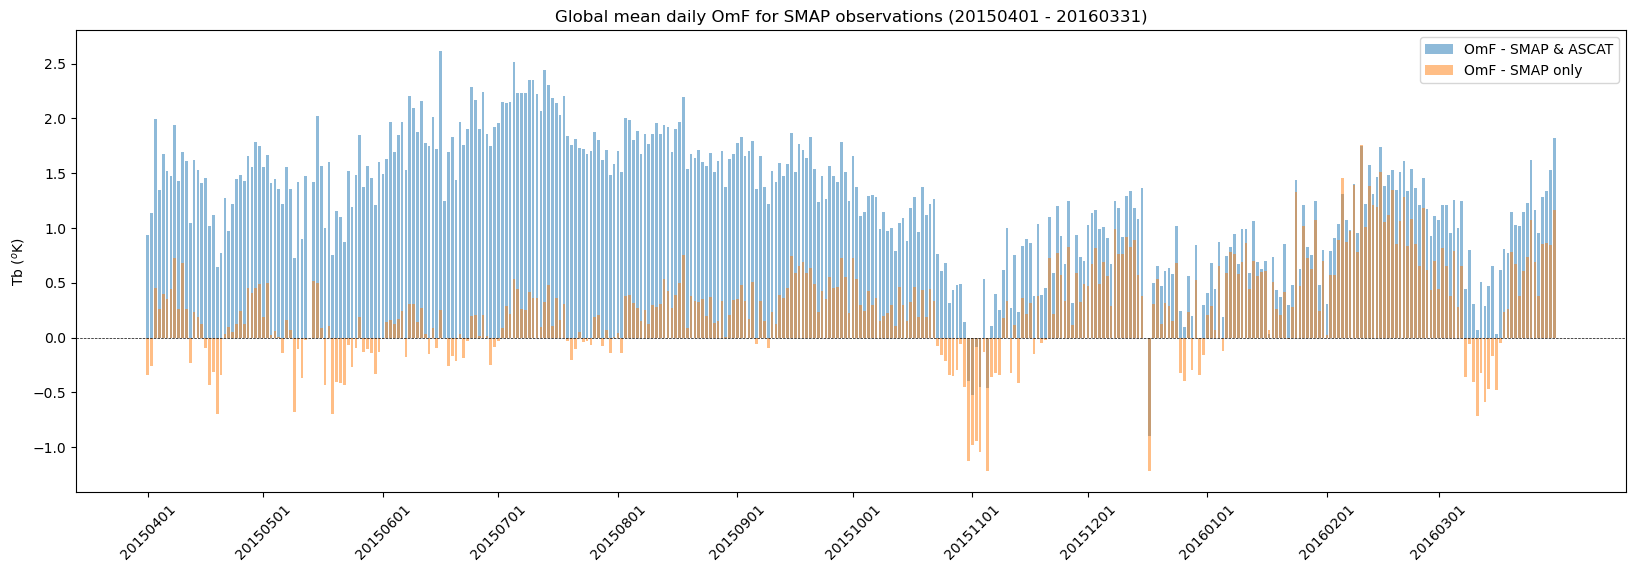

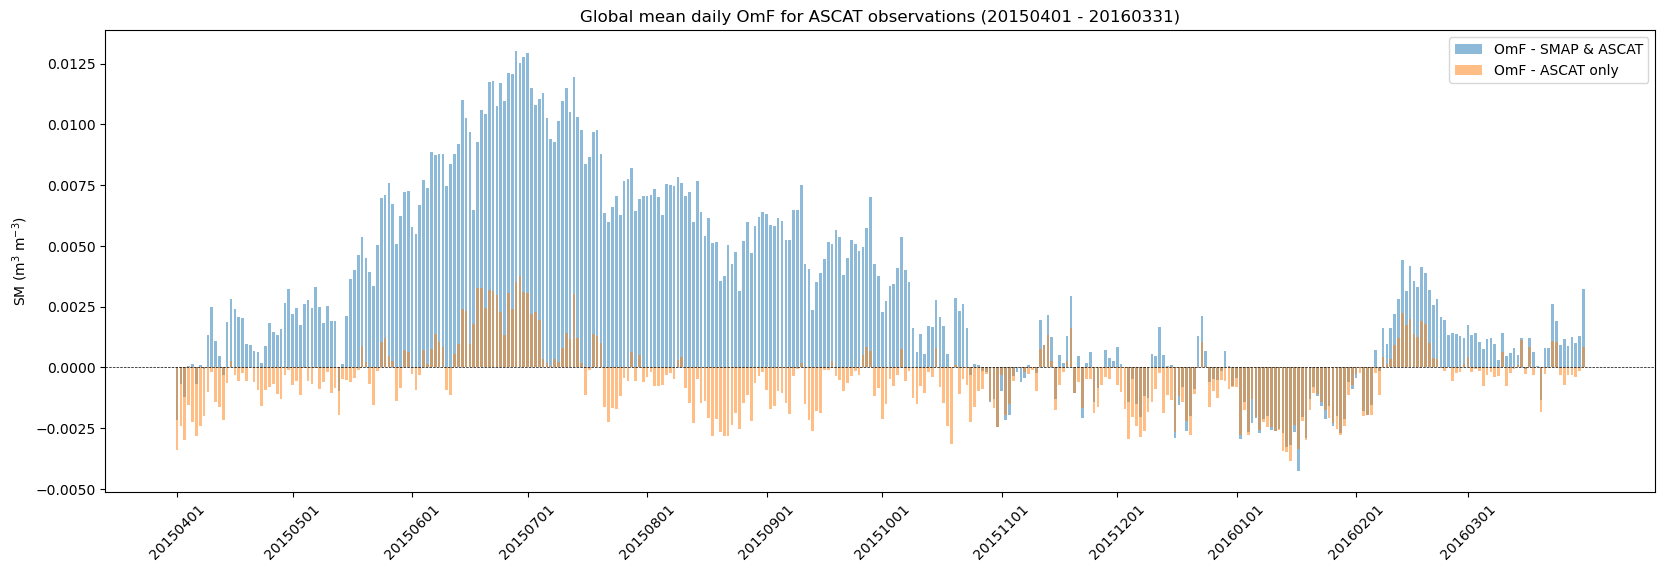

In [25]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_mean_list_a13s, bar_width, alpha=opacity, label='OmF - SMAP & ASCAT')
plt.bar(index, omf_mean_list_a10, bar_width, alpha=opacity, label='OmF - SMAP only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

plt.legend()

# Add a title
plt.title('Global mean daily OmF for SMAP observations (20150401 - 20160331)')

# Save the figure as a PNG file
plt.savefig('Global_mean_daily_OmF_for_SMAP.png')

plt.show()

# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_mean_list_a13a, bar_width, alpha=opacity, label='OmF - SMAP & ASCAT')
plt.bar(index, omf_mean_list_a2, bar_width, alpha=opacity, label='OmF - ASCAT only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Add a title
plt.title('Global mean daily OmF for ASCAT observations (20150401 - 20160331)')

# Save the figure as a PNG file
plt.savefig('Global_mean_daily_OmF_for_ASCAT.png')

plt.show()

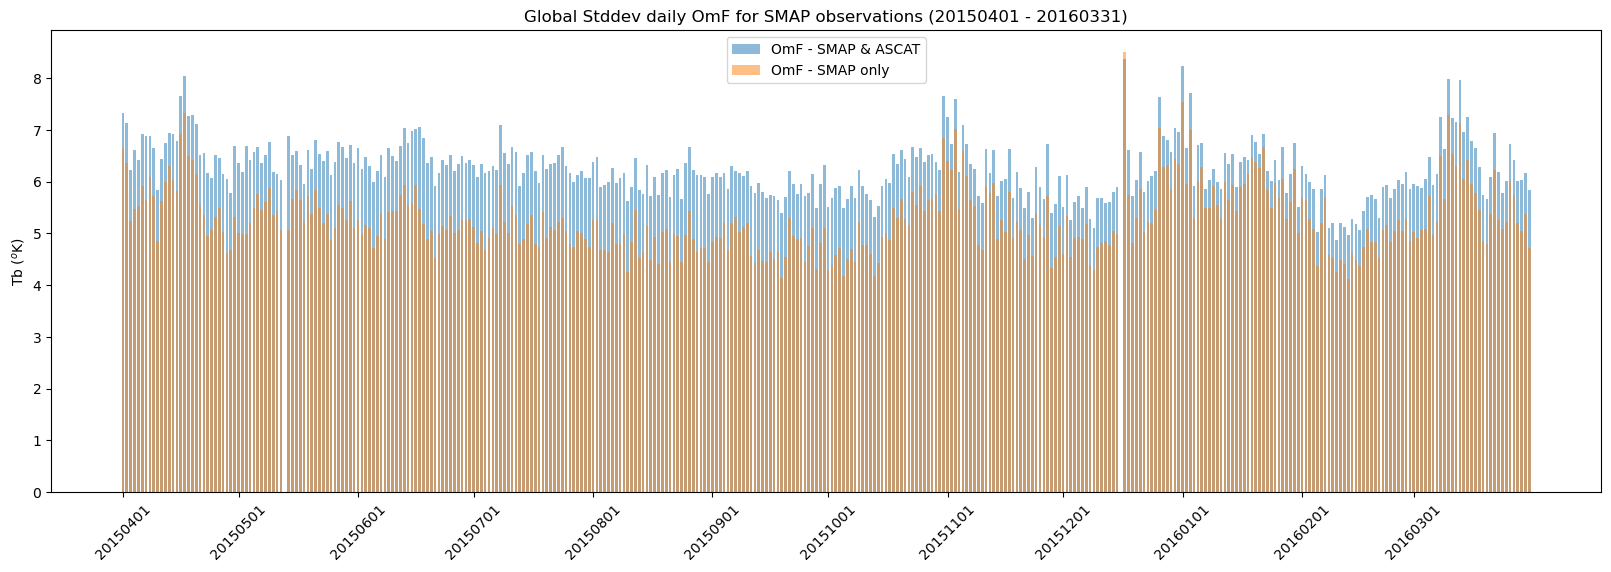

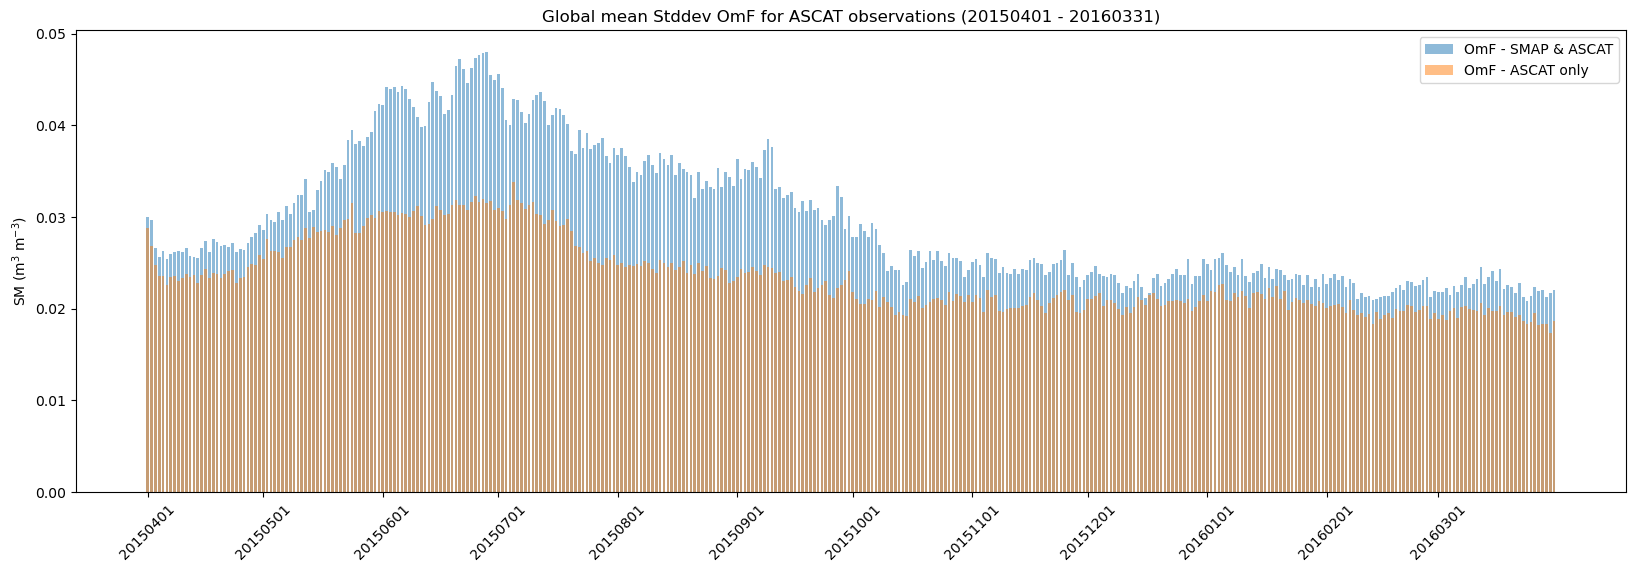

In [26]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_std_list_a13s, bar_width, alpha=opacity, label='OmF - SMAP & ASCAT')
plt.bar(index, omf_std_list_a10, bar_width, alpha=opacity, label='OmF - SMAP only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

plt.legend()

# Add a title
plt.title('Global Stddev daily OmF for SMAP observations (20150401 - 20160331)')

# Save the figure as a PNG file
plt.savefig('Global_std_daily_OmF_for_SMAP.png')

plt.show()

# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_std_list_a13a, bar_width, alpha=opacity, label='OmF - SMAP & ASCAT')
plt.bar(index, omf_std_list_a2, bar_width, alpha=opacity, label='OmF - ASCAT only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Add a title
plt.title('Global mean Stddev OmF for ASCAT observations (20150401 - 20160331)')

# Save the figure as a PNG file
plt.savefig('Global_std_daily_OmF_for_ASCAT.png')

plt.show()

Text(0.5, 1.0, 'Global mean daily OmA for ASCAT observations (20150401 - 20160331)')

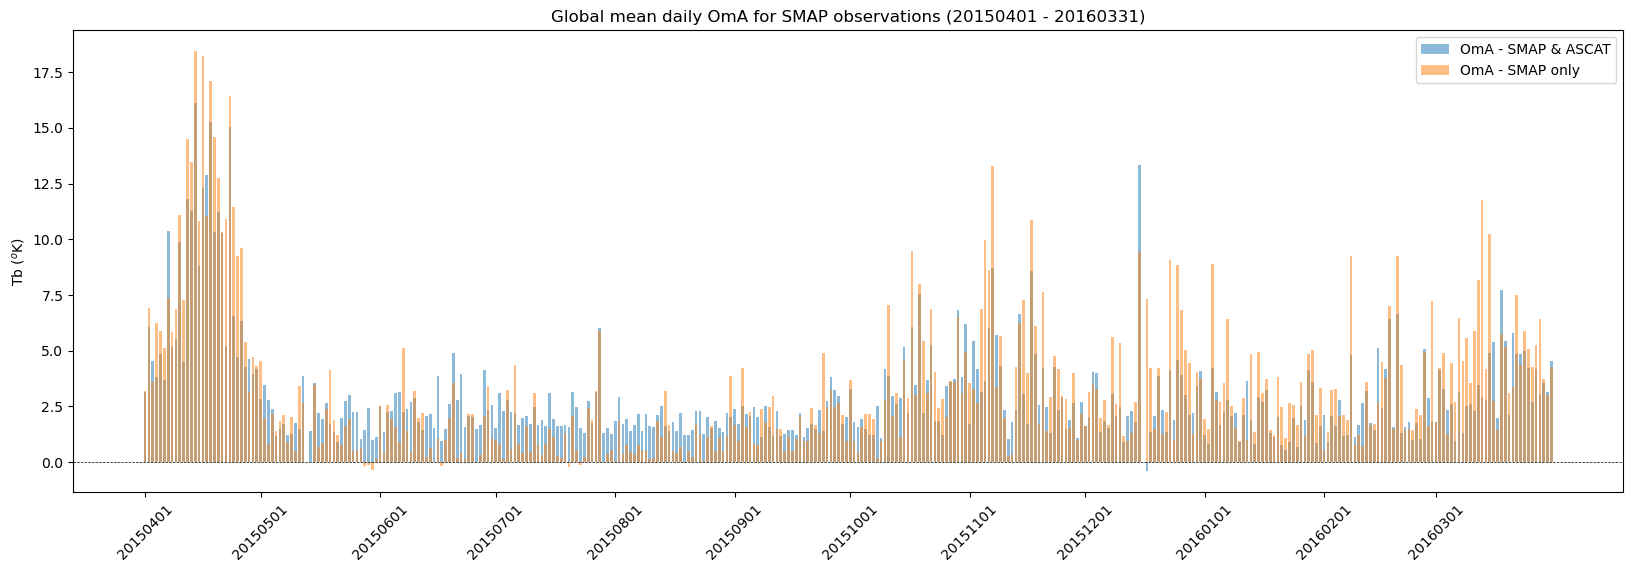

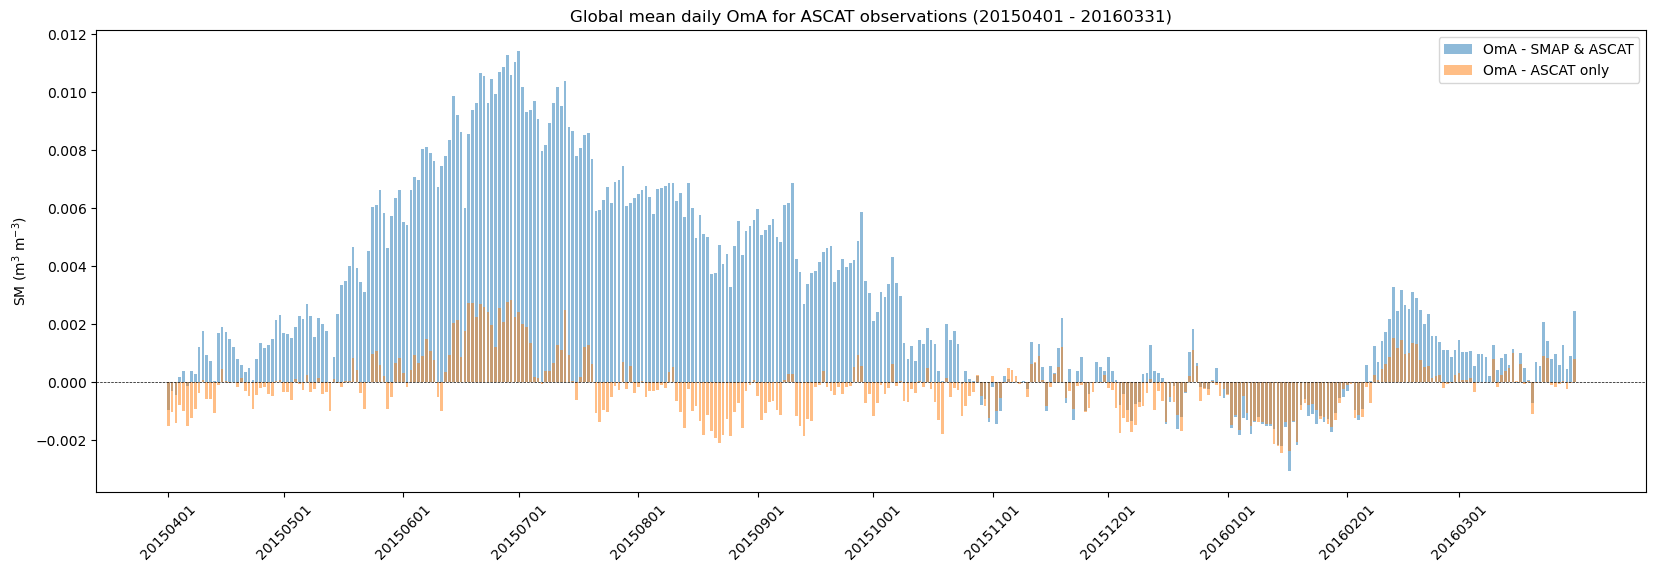

In [15]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, oma_mean_list_a13s, bar_width, alpha=opacity, label='OmA - SMAP & ASCAT')
plt.bar(index, oma_mean_list_a10, bar_width, alpha=opacity, label='OmA - SMAP only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

plt.legend()

# Add a title
plt.title('Global mean daily OmA for SMAP observations (20150401 - 20160331)')

# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, oma_mean_list_a13a, bar_width, alpha=opacity, label='OmA - SMAP & ASCAT')
plt.bar(index, oma_mean_list_a2, bar_width, alpha=opacity, label='OmA - ASCAT only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Add a title
plt.title('Global mean daily OmA for ASCAT observations (20150401 - 20160331)')

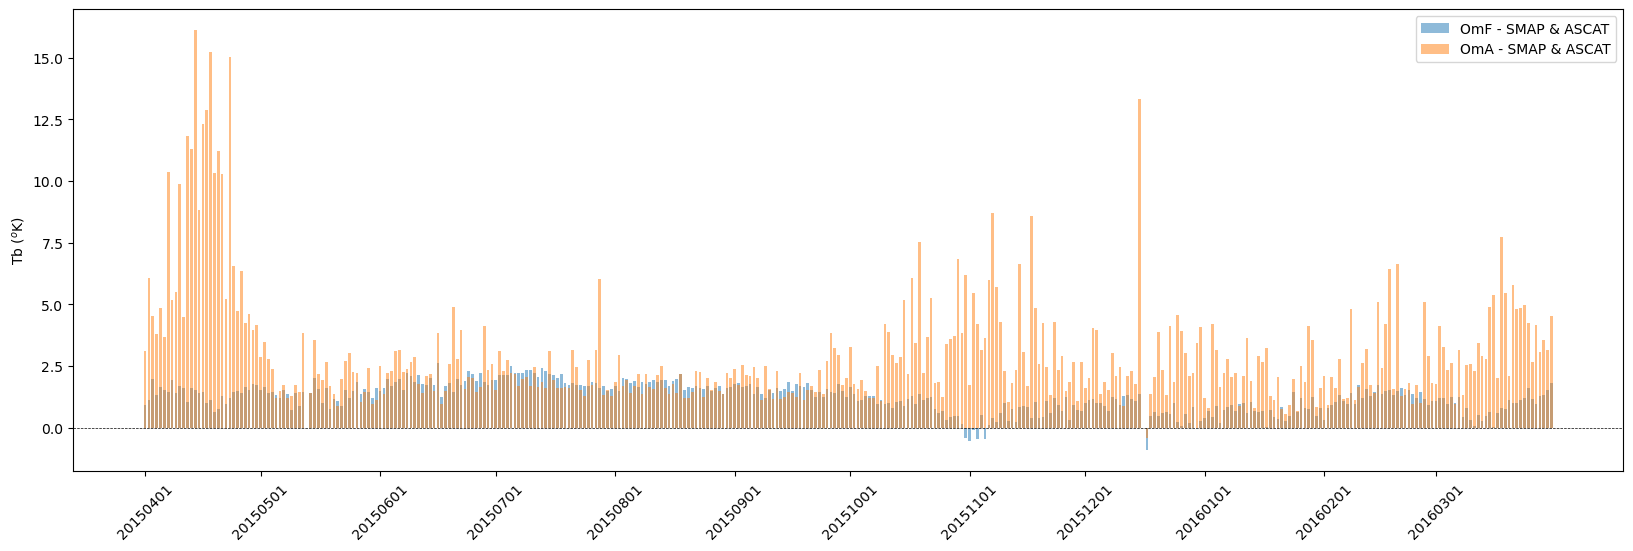

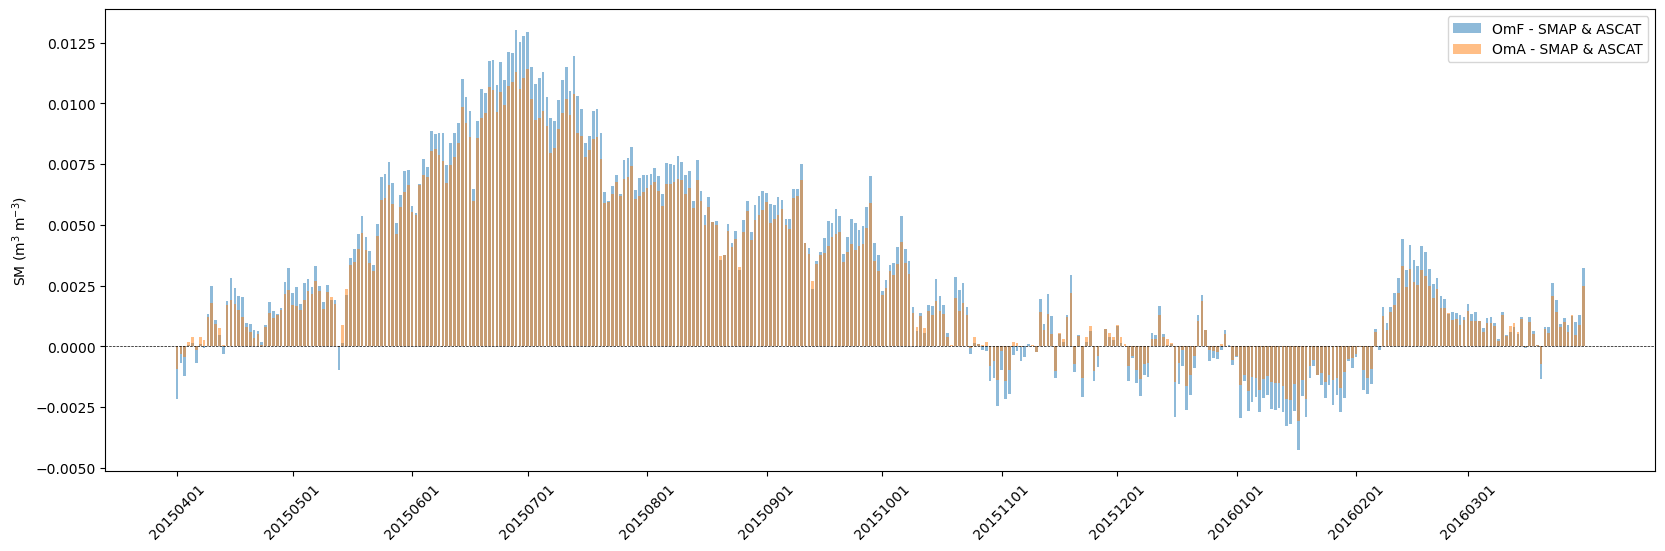

In [18]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_mean_list_a13s, bar_width, alpha=opacity, label='OmF - SMAP & ASCAT')
plt.bar(index, oma_mean_list_a13s, bar_width, alpha=opacity, label='OmA - SMAP & ASCAT')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

plt.legend()


# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_mean_list_a13a, bar_width, alpha=opacity, label='OmF - SMAP & ASCAT')
plt.bar(index, oma_mean_list_a13a, bar_width, alpha=opacity, label='OmA - SMAP & ASCAT')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

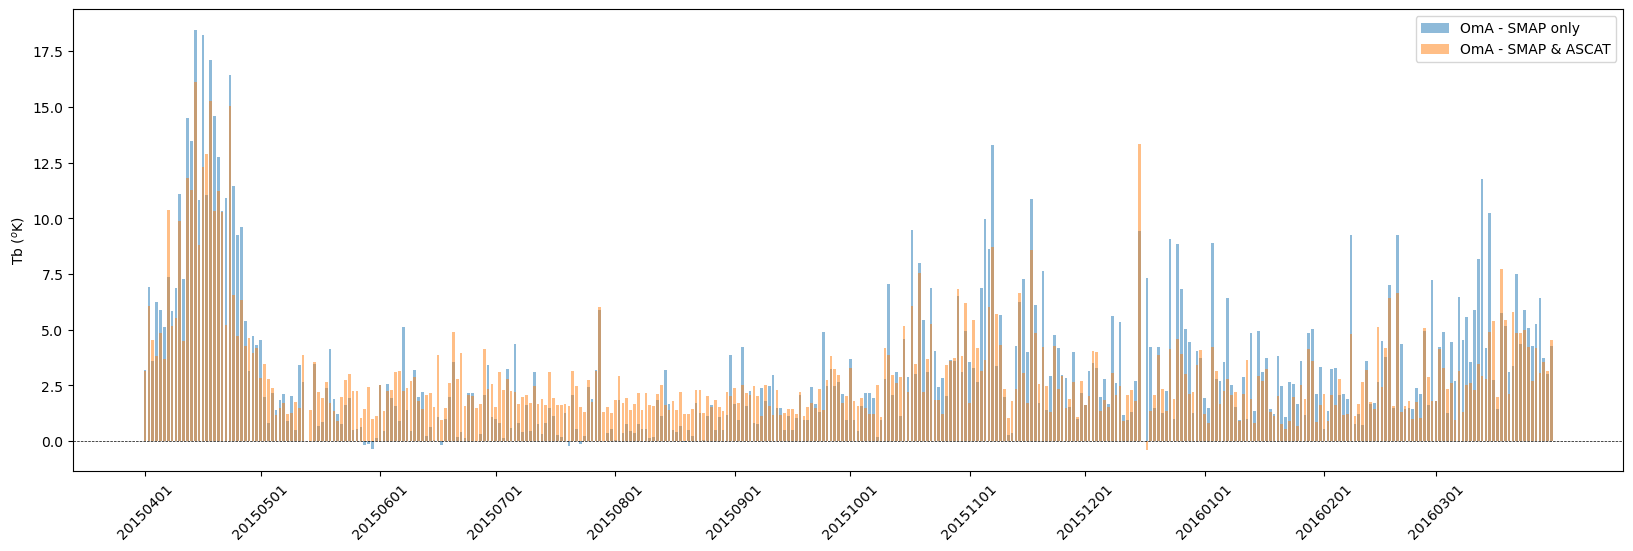

In [22]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, oma_mean_list_a10, bar_width, alpha=opacity, label='OmA - SMAP only')
plt.bar(index, oma_mean_list_a13s, bar_width, alpha=opacity, label='OmA - SMAP & ASCAT')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

plt.legend()

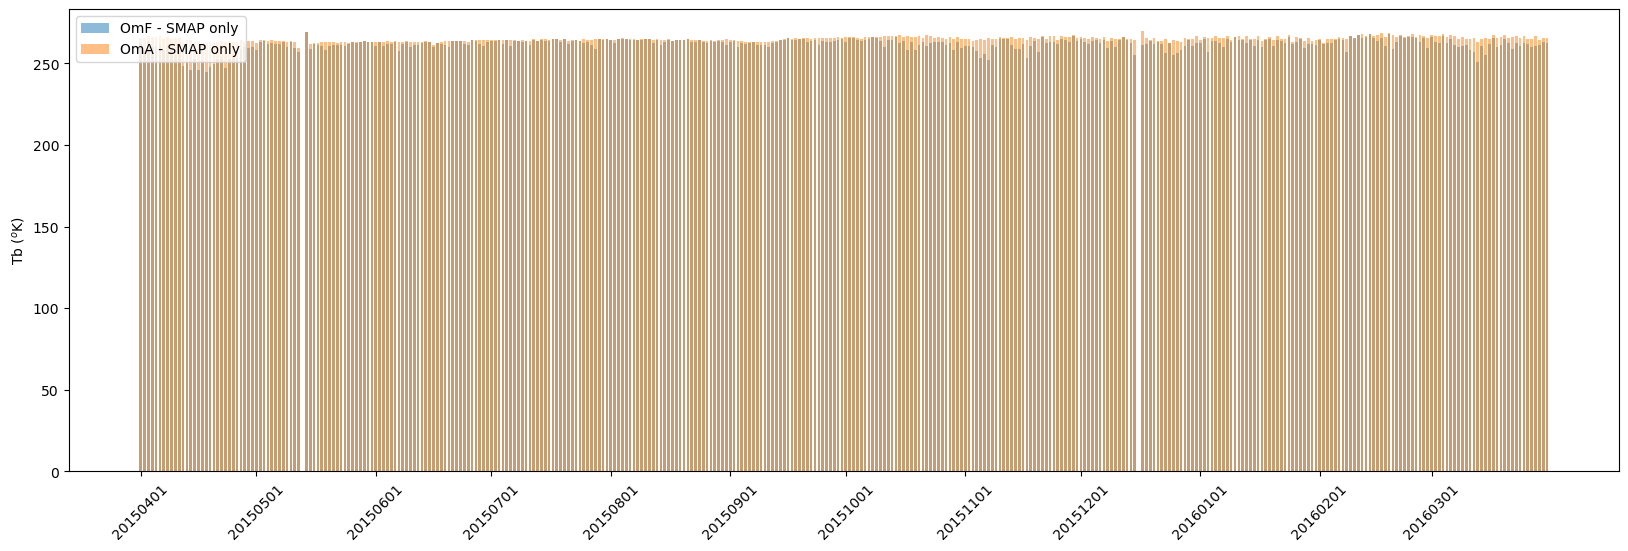

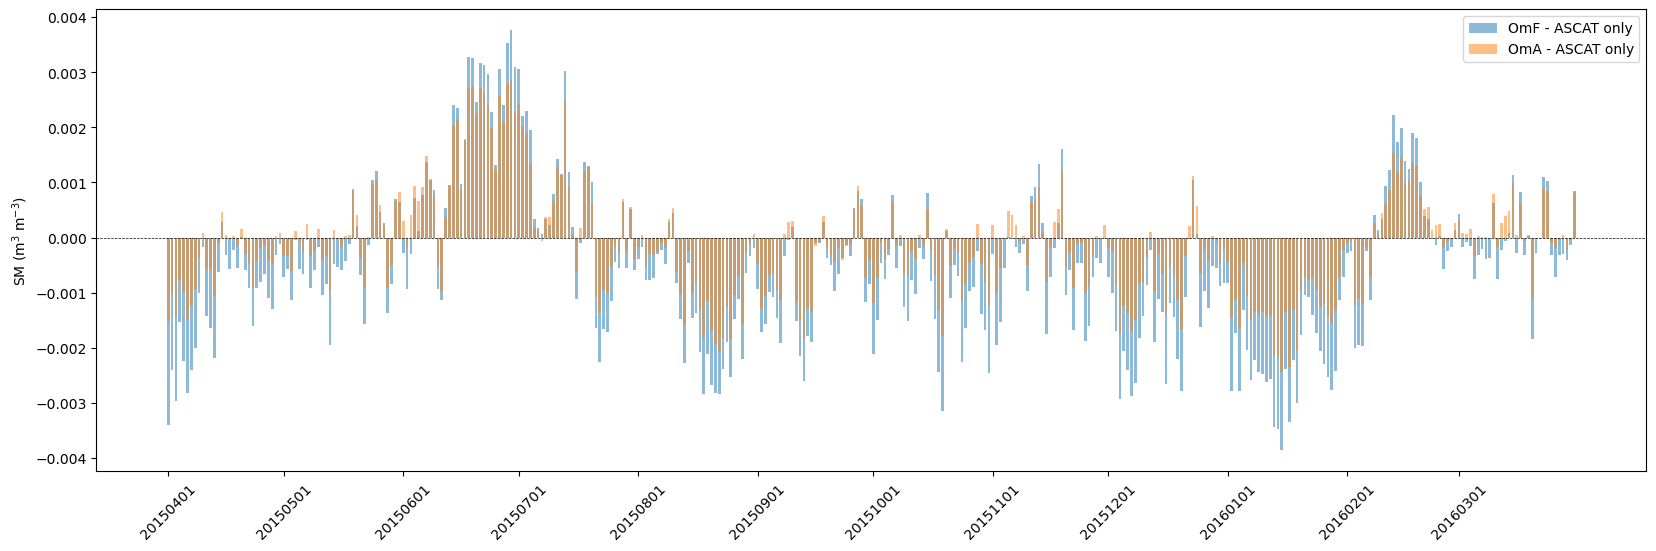

In [24]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, obs_ana_mean_list_a10, bar_width, alpha=opacity, label='OmF - SMAP only')
plt.bar(index, obs_fcst_mean_list_a10, bar_width, alpha=opacity, label='OmA - SMAP only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('Tb ($^o$K)')

plt.legend()

# Create a bar plot of the mean values
plt.figure(figsize=(20,6))
bar_width = 0.7
opacity = 0.5
index = np.arange(len(dates_list_a2))
plt.bar(index, omf_mean_list_a2, bar_width, alpha=opacity, label='OmF - ASCAT only')
plt.bar(index, oma_mean_list_a2, bar_width, alpha=opacity, label='OmA - ASCAT only')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a2 if date.endswith('01')]
xtick_indices = [dates_list_a2.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

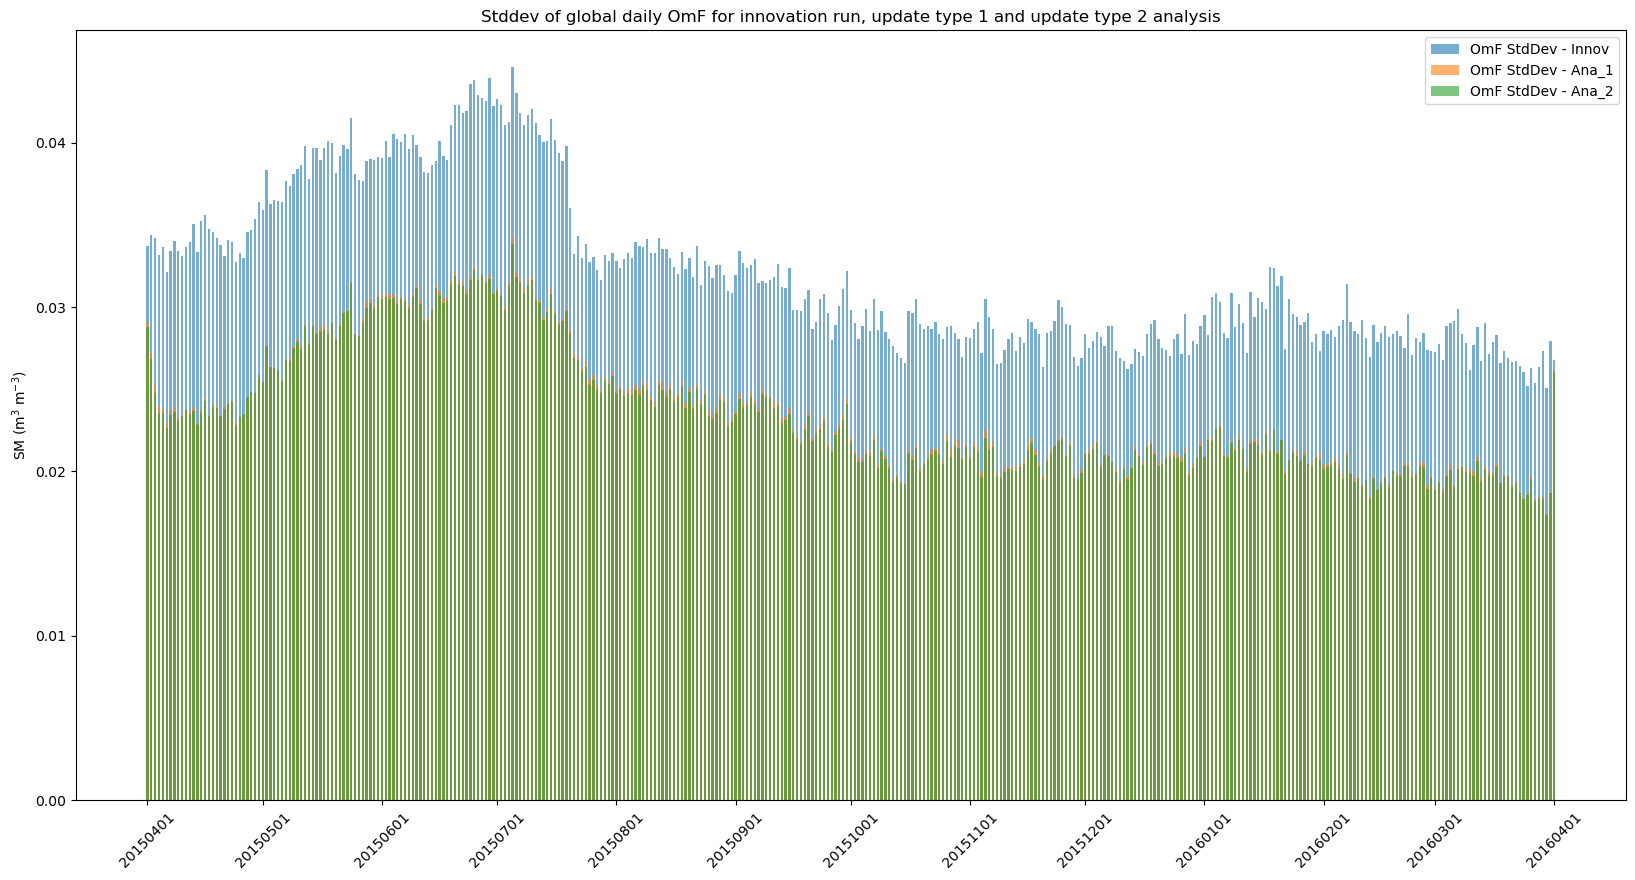

In [29]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.6
opacity = 0.6
index = np.arange(len(dates_list_a1))
plt.bar(index, omf_std_list_i[:len(index)], bar_width, alpha=opacity, label='OmF StdDev - Innov')
plt.bar(index, omf_std_list_a1, bar_width, alpha=opacity, label='OmF StdDev - Ana_1')
plt.bar(index, omf_std_list_a2, bar_width, alpha=opacity, label='OmF StdDev - Ana_2')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a1 if date.endswith('01')]
xtick_indices = [dates_list_a1.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Add a title
plt.title('Stddev of global daily OmF for innovation run, update type 1 and update type 2 analysis')

# Save the figure as a PNG file
plt.savefig('OmF_std_ts_i_a.png')

plt.show()

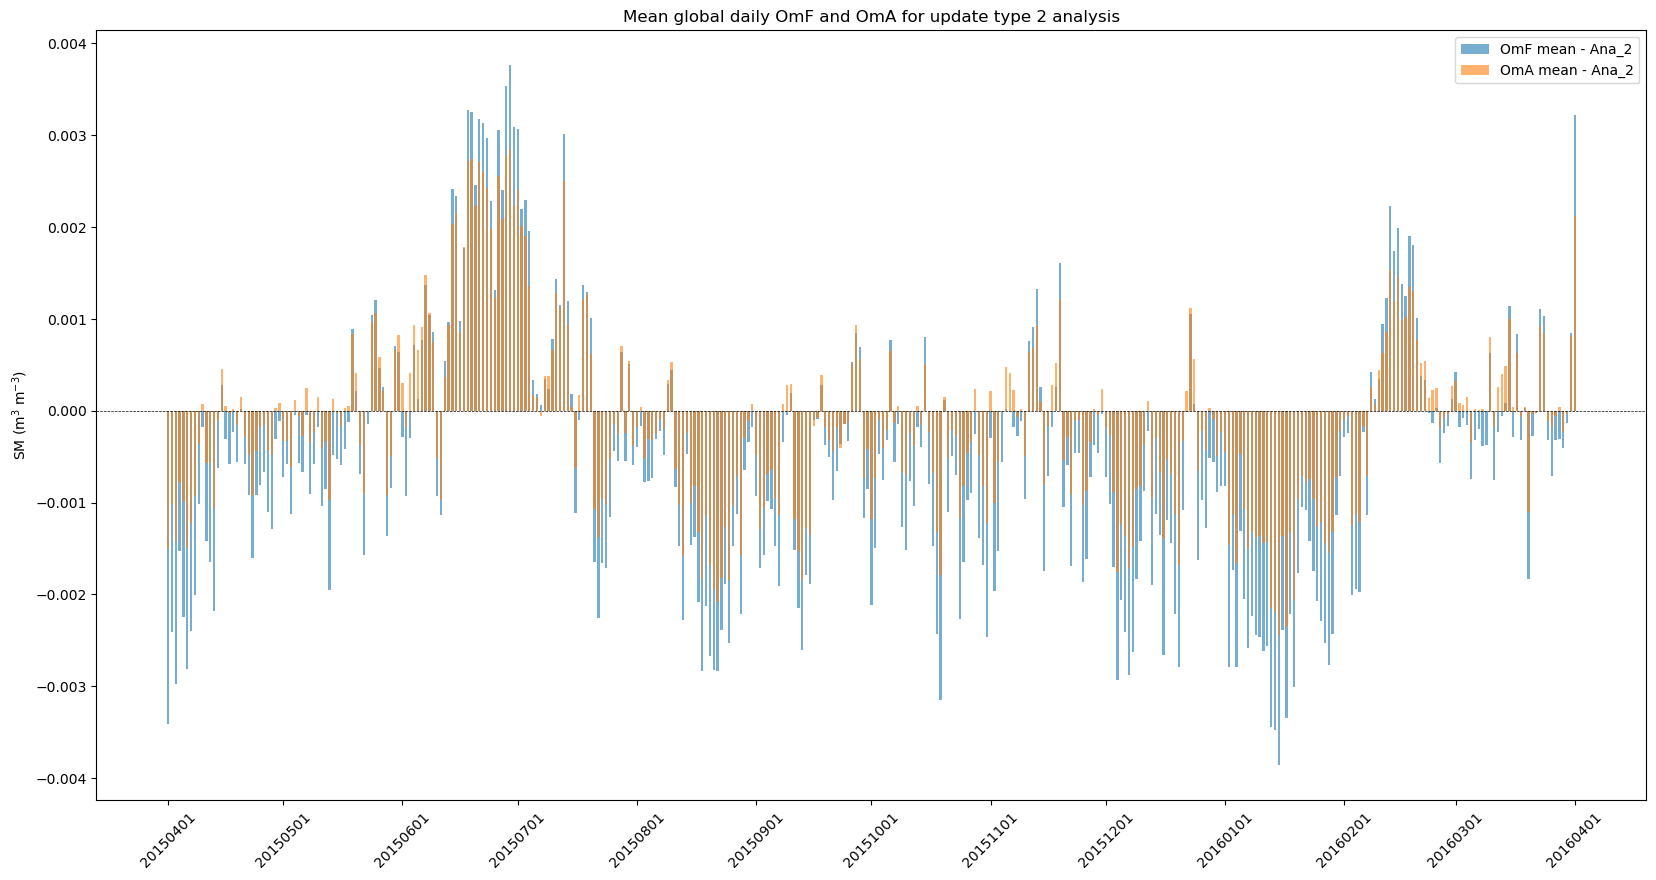

In [30]:
# Create a bar plot of the mean values
plt.figure(figsize=(20,10))
bar_width = 0.6
opacity = 0.6
index = np.arange(len(dates_list_a1))
plt.bar(index, omf_mean_list_a2, bar_width, alpha=opacity, label='OmF mean - Ana_2')
plt.bar(index, oma_mean_list_a2, bar_width, alpha=opacity, label='OmA mean - Ana_2')
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5) # Add a black line at y=0

# Set the x-axis tick labels to show the first day of each month
xticks = [date for date in dates_list_a1 if date.endswith('01')]
xtick_indices = [dates_list_a1.index(date) for date in xticks]
plt.xticks(xtick_indices, xticks, rotation=45)

# Add a y label
plt.ylabel('SM (m$^3$ m$^{-3}$)')

plt.legend()

# Add a title
plt.title('Mean global daily OmF and OmA for update type 2 analysis')

# Save the figure as a PNG file
plt.savefig('OmF_OmA_mean_ts_a.png')

plt.show()

In [45]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M10',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M11',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M12',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M02',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_1_update_analy/ASCAT_type_1_update_analy/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M03']
         

# Define the common file name start
file_name_start = 'ASCAT_type_1_update_analy.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []
obs_ana_list = []


# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)
    obs_ana_list.append(obs_ana)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_fcst = np.concatenate(obs_fcst_list)
obs_ana = np.concatenate(obs_ana_list)

nodata = -9999

obs_obs[obs_obs == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan

In [46]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

# Calculate lon and lat
lon = np.linspace(ll_lon, ll_lon + nx * dlon, nx)
lat = np.linspace(ll_lat, ll_lat + ny * dlat, ny)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

n_obs = len(obs_obs)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

for i in range(n_obs):
    i_out[i] = np.floor((obs_lon[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat[i] - ll_lat)/dlat)

# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
omf_list = [[[] for i in range(ny)] for j in range(nx)]
oma_list = [[[] for i in range(ny)] for j in range(nx)]
inc_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst[i])
    omf_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_fcst[i])
    oma_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_ana[i])
    inc_list[int(i_out[i])][int(j_out[i])].append(obs_ana[i] - obs_fcst[i])

# Calculate the mean of the observations in each grid cell
obs_mean_a1 = np.zeros([nx, ny])
obs_count_a1 = np.zeros([nx, ny])
fcst_mean_a1 = np.zeros([nx, ny])
omf_mean_a1 = np.zeros([nx, ny])
omf_max_a1 = np.zeros([nx, ny])
omf_std_a1 = np.zeros([nx, ny])
oma_mean_a1 = np.zeros([nx, ny])
oma_max_a1 = np.zeros([nx, ny])
oma_std_a1 = np.zeros([nx, ny])
inc_mean_a1 = np.zeros([nx, ny])
inc_max_a1 = np.zeros([nx, ny])
inc_std_a1 = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean_a1[i, j] = np.nanmean(obs_list[i][j])
            obs_count_a1[i, j] = len(obs_list[i][j])
            fcst_mean_a1[i, j] = np.nanmean(fcst_list[i][j])
            omf_mean_a1[i, j] = np.nanmean(omf_list[i][j])
            omf_max_a1[i, j] = np.nanmax(abs(np.array(omf_list[i][j])))
            omf_std_a1[i, j] = np.nanstd(omf_list[i][j])
            oma_mean_a1[i, j] = np.nanmean(oma_list[i][j])
            oma_max_a1[i, j] = np.nanmax(abs(np.array(oma_list[i][j])))
            oma_std_a1[i, j] = np.nanstd(oma_list[i][j])
            inc_mean_a1[i, j] = np.nanmean(inc_list[i][j])
            inc_max_a1[i, j] = np.nanmax(abs(np.array(inc_list[i][j])))
            inc_std_a1[i, j] = np.nanstd(inc_list[i][j])
        else:
            obs_mean_a1[i, j] = np.nan
            obs_count_a1[i, j] = np.nan
            fcst_mean_a1[i, j] = np.nan
            omf_mean_a1[i, j] = np.nan
            omf_max_a1[i, j] = np.nan
            omf_std_a1[i, j] = np.nan
            oma_mean_a1[i, j] = np.nan
            oma_max_a1[i, j] = np.nan
            oma_std_a1[i, j] = np.nan
            inc_mean_a1[i, j] = np.nan
            inc_max_a1[i, j] = np.nan
            inc_std_a1[i, j] = np.nan
            

In [47]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M10',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M11',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M12',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M01',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M02',
         '/discover/nobackup/amfox/Experiments/ASCAT_new_scaling_innov/ASCAT_new_scaling_innov/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2016/M03']

# Define the common file name start
file_name_start = 'ASCAT_new_scaling_innov.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []
obs_ana_list = []

# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)
    obs_ana_list.append(obs_ana)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_fcst = np.concatenate(obs_fcst_list)
obs_ana = np.concatenate(obs_ana_list)

nodata = -9999

obs_obs[obs_obs == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan

In [48]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

# Calculate lon and lat
lon = np.linspace(ll_lon, ll_lon + nx * dlon, nx)
lat = np.linspace(ll_lat, ll_lat + ny * dlat, ny)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

n_obs = len(obs_obs)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

for i in range(n_obs):
    i_out[i] = np.floor((obs_lon[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat[i] - ll_lat)/dlat)

# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
omf_list = [[[] for i in range(ny)] for j in range(nx)]
oma_list = [[[] for i in range(ny)] for j in range(nx)]
inc_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst[i])
    omf_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_fcst[i])
    oma_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_ana[i])
    inc_list[int(i_out[i])][int(j_out[i])].append(obs_ana[i] - obs_fcst[i])

# Calculate the mean of the observations in each grid cell
obs_mean_i = np.zeros([nx, ny])
obs_count_i = np.zeros([nx, ny])
fcst_mean_i = np.zeros([nx, ny])
omf_mean_i = np.zeros([nx, ny])
omf_max_i = np.zeros([nx, ny])
omf_std_i = np.zeros([nx, ny])
oma_mean_i = np.zeros([nx, ny])
oma_max_i = np.zeros([nx, ny])
oma_std_i = np.zeros([nx, ny])
inc_mean_i = np.zeros([nx, ny])
inc_max_i = np.zeros([nx, ny])
inc_std_i = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean_i[i, j] = np.nanmean(obs_list[i][j])
            obs_count_i[i, j] = len(obs_list[i][j])
            fcst_mean_i[i, j] = np.nanmean(fcst_list[i][j])
            omf_mean_i[i, j] = np.nanmean(omf_list[i][j])
            omf_max_i[i, j] = np.nanmax(abs(np.array(omf_list[i][j])))
            omf_std_i[i, j] = np.nanstd(omf_list[i][j])
            oma_mean_i[i, j] = np.nanmean(oma_list[i][j])
            oma_max_i[i, j] = np.nanmax(abs(np.array(oma_list[i][j])))
            oma_std_i[i, j] = np.nanstd(oma_list[i][j])
            inc_mean_i[i, j] = np.nanmean(inc_list[i][j])
            inc_max_i[i, j] = np.nanmax(abs(np.array(inc_list[i][j])))
            inc_std_i[i, j] = np.nanstd(inc_list[i][j])
        else:
            obs_mean_i[i, j] = np.nan
            obs_count_i[i, j] = np.nan
            fcst_mean_i[i, j] = np.nan
            omf_mean_i[i, j] = np.nan
            omf_max_i[i, j] = np.nan
            omf_std_i[i, j] = np.nan
            oma_mean_i[i, j] = np.nan
            oma_max_i[i, j] = np.nan
            oma_std_i[i, j] = np.nan
            inc_mean_i[i, j] = np.nan
            inc_max_i[i, j] = np.nan
            inc_std_i[i, j] = np.nan

In [49]:
print(len(obs_obs))
print(len(obs_ana))

32596038
32596038


In [50]:
# Define the list of paths
paths = ['/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M04',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M05',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M07',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M08',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M09',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M10',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M11',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M12',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M01',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M02',
         '/discover/nobackup/amfox/Experiments/ASCAT_type_2_aggress_bugfix/ASCAT_type_2_aggress_bugfix/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M03']

# Define the common file name start
file_name_start = 'ASCAT_type_2_aggress_bugfix.ens_avg.ldas_ObsFcstAna.20'

# Define the print flag
printflag = False

# Initialize lists to store the returned values
date_times = []
obs_species_list = []
obs_tilenum_list = []
obs_lon_list = []
obs_lat_list = []
obs_obs_list = []
obs_fcst_list = []
obs_ana_list = []


# Loop over the paths
for path in paths:
    # Call the read_obsfcstana function for the current path
    date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)
    
    # Append the returned values to the lists
    date_times.append(date_time)
    obs_species_list.append(obs_species)
    obs_tilenum_list.append(obs_tilenum)
    obs_lon_list.append(obs_lon)
    obs_lat_list.append(obs_lat)
    obs_obs_list.append(obs_obs)
    obs_fcst_list.append(obs_fcst)
    obs_ana_list.append(obs_ana)

# Combine the returned values from all paths
date_time = np.concatenate(date_times)
obs_species = np.concatenate(obs_species_list)
obs_tilenum = np.concatenate(obs_tilenum_list)
obs_lon = np.concatenate(obs_lon_list)
obs_lat = np.concatenate(obs_lat_list)
obs_obs = np.concatenate(obs_obs_list)
obs_fcst = np.concatenate(obs_fcst_list)
obs_ana = np.concatenate(obs_ana_list)

nodata = -9999

obs_obs[obs_obs == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan

In [51]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

# Calculate lon and lat
lon = np.linspace(ll_lon, ll_lon + nx * dlon, nx)
lat = np.linspace(ll_lat, ll_lat + ny * dlat, ny)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

n_obs = len(obs_obs)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)

for i in range(n_obs):
    i_out[i] = np.floor((obs_lon[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat[i] - ll_lat)/dlat)

# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]
omf_list = [[[] for i in range(ny)] for j in range(nx)]
oma_list = [[[] for i in range(ny)] for j in range(nx)]
inc_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst[i])
    omf_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_fcst[i])
    oma_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i] - obs_ana[i])
    inc_list[int(i_out[i])][int(j_out[i])].append(obs_ana[i] - obs_fcst[i])

# Calculate the mean of the observations in each grid cell
obs_mean_a2 = np.zeros([nx, ny])
obs_count_a2 = np.zeros([nx, ny])
fcst_mean_a2 = np.zeros([nx, ny])
omf_mean_a2 = np.zeros([nx, ny])
omf_max_a2 = np.zeros([nx, ny])
omf_std_a2 = np.zeros([nx, ny])
oma_mean_a2 = np.zeros([nx, ny])
oma_max_a2 = np.zeros([nx, ny])
oma_std_a2 = np.zeros([nx, ny])
inc_mean_a2 = np.zeros([nx, ny])
inc_max_a2 = np.zeros([nx, ny])
inc_std_a2 = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean_a2[i, j] = np.nanmean(obs_list[i][j])
            obs_count_a2[i, j] = len(obs_list[i][j])
            fcst_mean_a2[i, j] = np.nanmean(fcst_list[i][j])
            omf_mean_a2[i, j] = np.nanmean(omf_list[i][j])
            omf_max_a2[i, j] = np.nanmax(abs(np.array(omf_list[i][j])))
            omf_std_a2[i, j] = np.nanstd(omf_list[i][j])
            oma_mean_a2[i, j] = np.nanmean(oma_list[i][j])
            oma_max_a2[i, j] = np.nanmax(abs(np.array(oma_list[i][j])))
            oma_std_a2[i, j] = np.nanstd(oma_list[i][j])
            inc_mean_a2[i, j] = np.nanmean(inc_list[i][j])
            inc_max_a2[i, j] = np.nanmax(abs(np.array(inc_list[i][j])))
            inc_std_a2[i, j] = np.nanstd(inc_list[i][j])
        else:
            obs_mean_a2[i, j] = np.nan
            obs_count_a2[i, j] = np.nan
            fcst_mean_a2[i, j] = np.nan
            omf_mean_a2[i, j] = np.nan
            omf_max_a2[i, j] = np.nan
            omf_std_a2[i, j] = np.nan
            oma_mean_a2[i, j] = np.nan
            oma_max_a2[i, j] = np.nan
            oma_std_a2[i, j] = np.nan
            inc_mean_a2[i, j] = np.nan
            inc_max_a2[i, j] = np.nan
            inc_std_a2[i, j] = np.nan

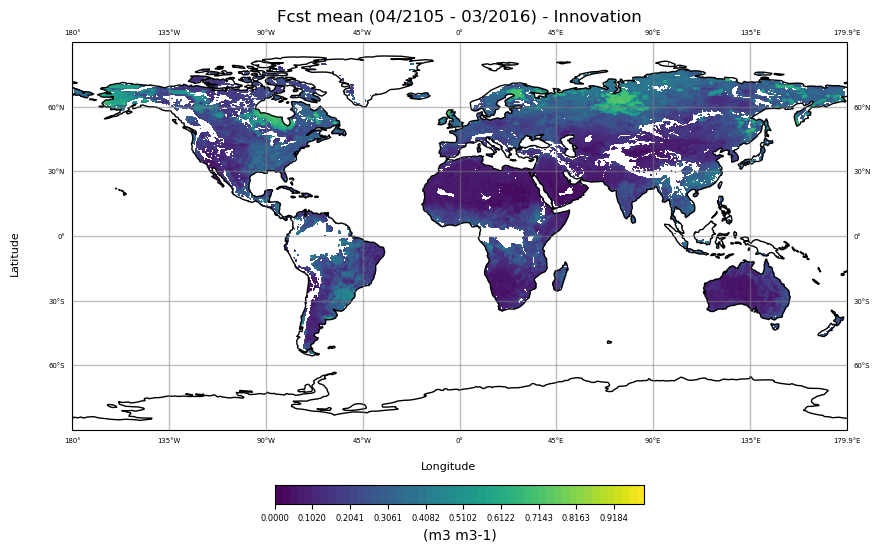

In [56]:
plot_global_contour(lon2d, lat2d, fcst_mean_i.T, False, 'Fcst mean (04/2105 - 03/2016) - Innovation', '(m3 m3-1)',0,1.0)

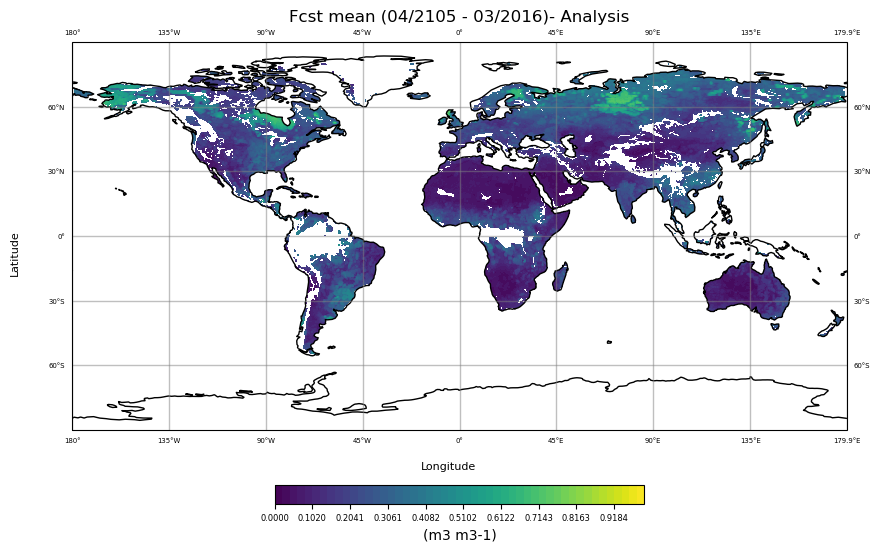

In [57]:
plot_global_contour(lon2d, lat2d, fcst_mean_a2.T, False, 'Fcst mean (04/2105 - 03/2016)- Analysis', '(m3 m3-1)',0,1.0)

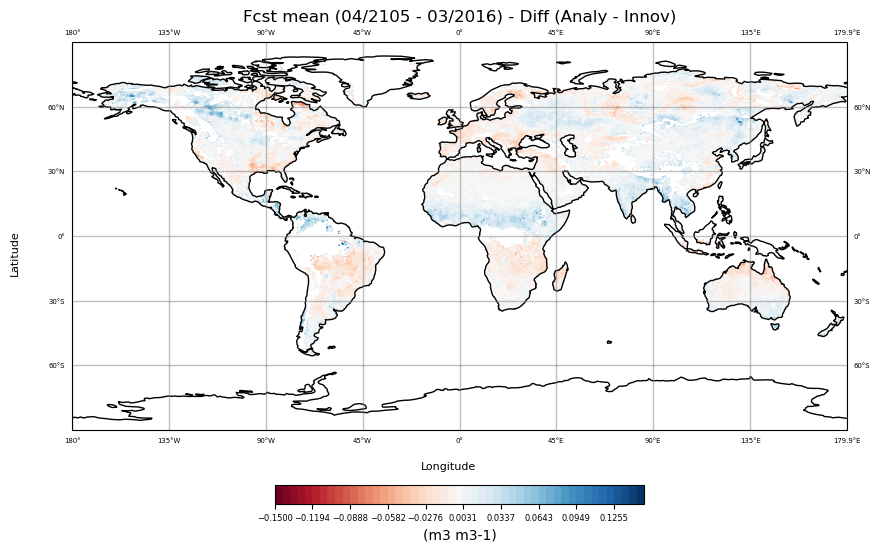

In [58]:
plot_global_contour(lon2d, lat2d, (fcst_mean_a2 - fcst_mean_i).T, False, 'Fcst mean (04/2105 - 03/2016) - Diff (Analy - Innov)', '(m3 m3-1)', -0.15, 0.15)

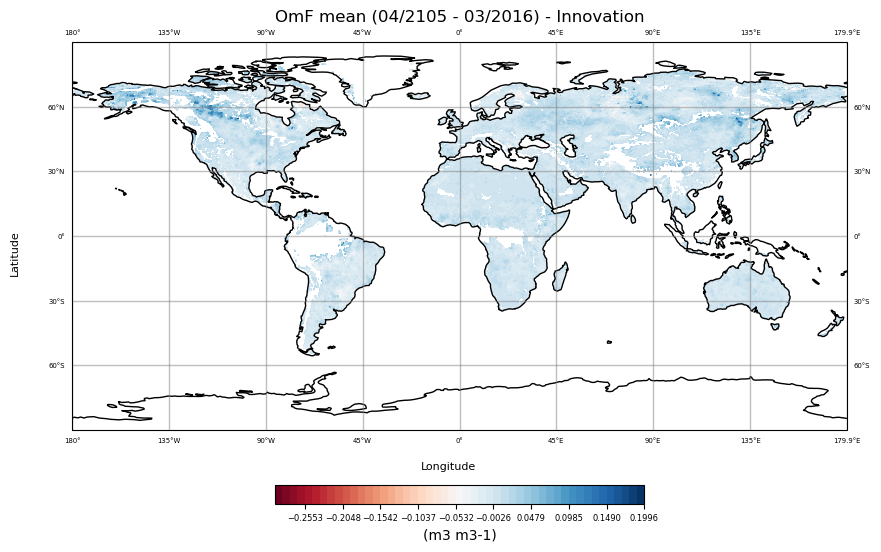

In [59]:
plot_global_contour(lon2d, lat2d, omf_mean_i.T, False, 'OmF mean (04/2105 - 03/2016) - Innovation', '(m3 m3-1)')

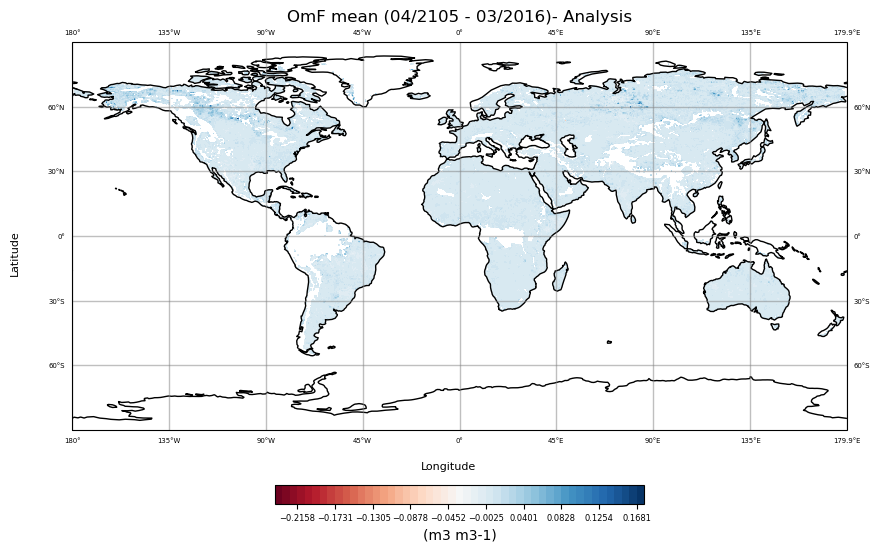

In [60]:
plot_global_contour(lon2d, lat2d, omf_mean_a2.T, False, 'OmF mean (04/2105 - 03/2016)- Analysis', '(m3 m3-1)')

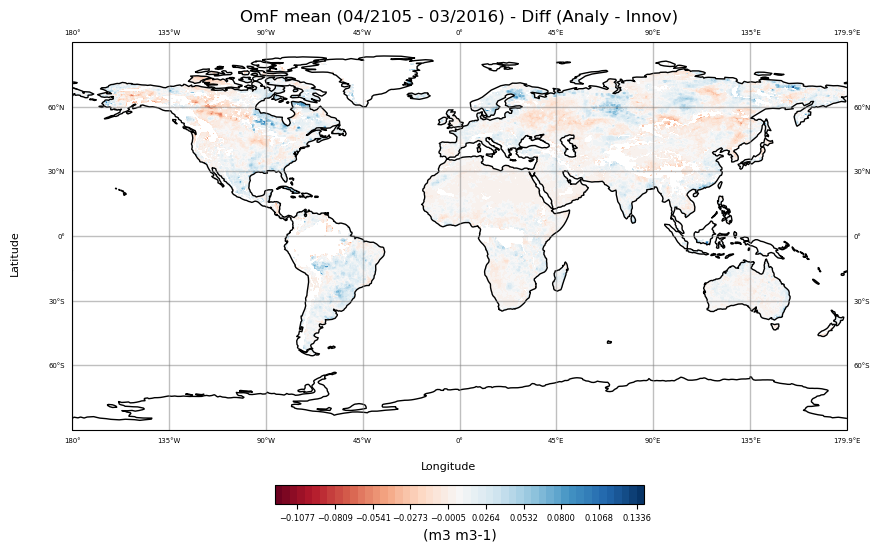

In [61]:
plot_global_contour(lon2d, lat2d, (omf_mean_a2 - omf_mean_i).T, False, 'OmF mean (04/2105 - 03/2016) - Diff (Analy - Innov)', '(m3 m3-1)')

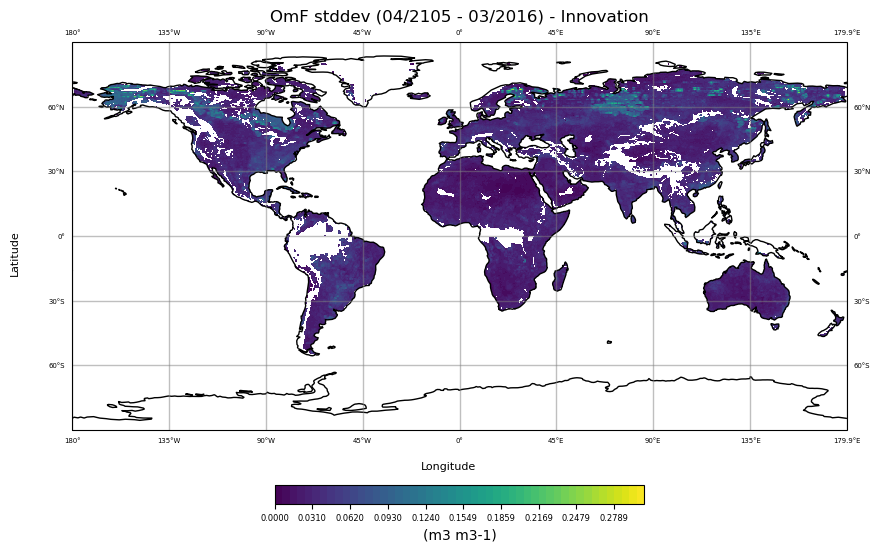

In [62]:
plot_global_contour(lon2d, lat2d, omf_std_i.T, False, 'OmF stddev (04/2105 - 03/2016) - Innovation', '(m3 m3-1)')

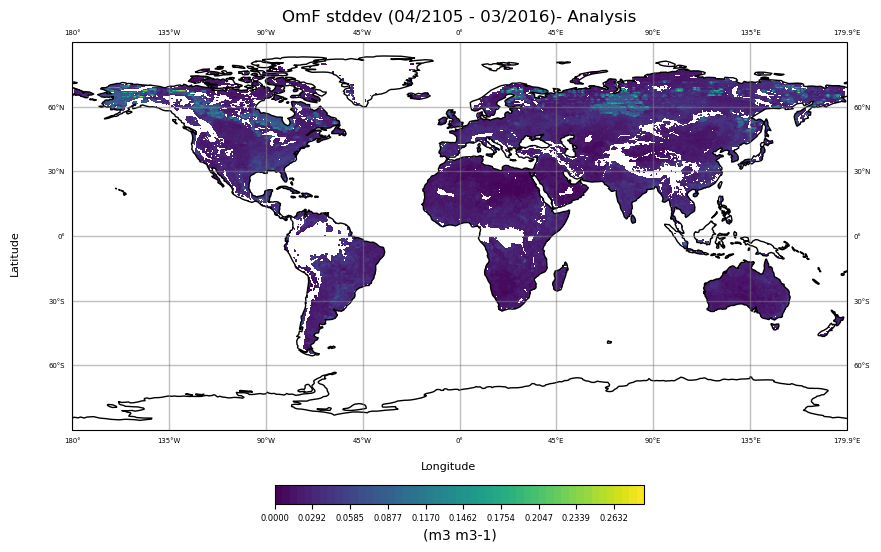

In [63]:
plot_global_contour(lon2d, lat2d, omf_std_a2.T, False, 'OmF stddev (04/2105 - 03/2016)- Analysis', '(m3 m3-1)')

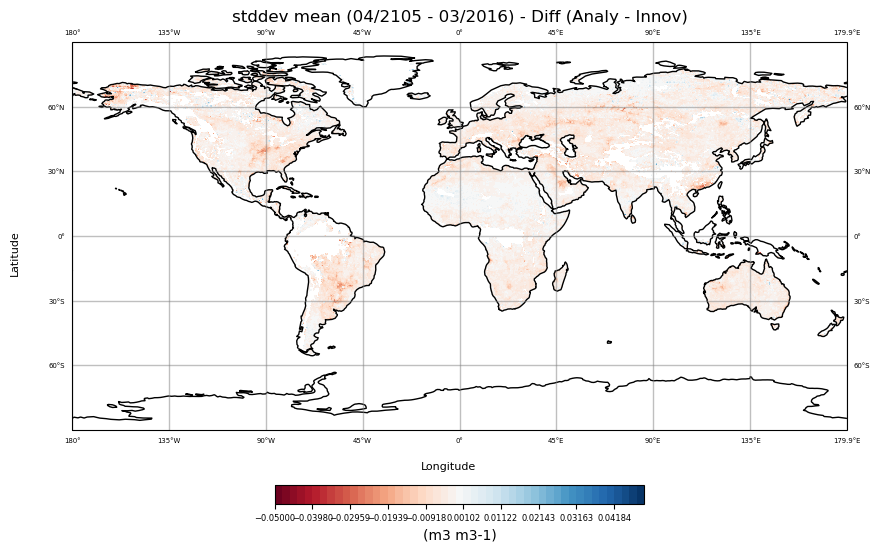

In [64]:
plot_global_contour(lon2d, lat2d, (omf_std_a2 - omf_std_i).T, False, 'stddev mean (04/2105 - 03/2016) - Diff (Analy - Innov)', '(m3 m3-1)', -0.05, 0.05)